In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from sklearn.metrics import confusion_matrix, auc, classification_report
import seaborn as sns

In [4]:
import time

In [5]:
# Load the covtype dataset
covtype = fetch_covtype()


In [6]:
# Extract features and target
X = covtype.data
y = covtype.target

In [7]:
n_components = min(X.shape[1], len(np.unique(y))-1)

In [8]:
# Define functions for feature extraction and compression
def pca_feature_extraction(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return pca, X_pca


In [9]:
def lda_feature_extraction(X, y, n_components):
    lda = LDA(n_components=min(n_components, X.shape[1], np.unique(y).size - 1))
    X_lda = lda.fit_transform(X, y)
    return lda, X_lda

In [10]:
def classification_after_feature_extraction(X_train, X_test, y_train, y_test, method, n_components=None):
    if method == 'pca':
        if n_components is None:
            raise ValueError("Number of components (n_components) must be specified for PCA.")
        pca = PCA(n_components=n_components)
        X_train_transformed = pca.fit_transform(X_train)
        X_test_transformed = pca.transform(X_test)
    elif method == 'lda':
        if n_components is None:
            raise ValueError("Number of components (n_components) must be specified for LDA.")
        lda = LDA(n_components=min(n_components, X.shape[1], np.unique(y_train).size - 1))
        X_train_transformed = lda.fit_transform(X_train, y_train)
        X_test_transformed = lda.transform(X_test)
    else:
        raise ValueError("Invalid feature extraction method specified.")
    
    # Train a k-nearest neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_transformed, y_train)
    
    # Predict on the test set
    y_pred = knn.predict(X_test_transformed)
    
    return knn, X_test_transformed

In [35]:
# Define a function to compute and plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted (1-7)')
    plt.ylabel('True (1-7)')
    plt.title(title)
    plt.show()
    print(cm)

In [14]:
# Define a function to visualize transformed data
def visualize_transformed_data(X_transformed, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis', s=10)
    plt.colorbar(label='Class')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [15]:
# Define function to plot compression graphs
def plot_compression(original_dims, pca_compressed_dims, lda_compressed_dims):
    plt.figure(figsize=(10, 5))
    plt.plot(original_dims, label='Original Dimensions')
    plt.plot(pca_compressed_dims, label='PCA Compressed Dimensions')
    plt.plot(lda_compressed_dims, label='LDA Compressed Dimensions')
    plt.xlabel('Number of Components')
    plt.ylabel('Dimensionality')
    plt.title('Compression Comparison')
    plt.legend()
    plt.show()

In [16]:
# Start a timer for calculating the elapsed time to perform feature extraction for PCA
pca_start_time = time.time()
# PCA Feature extraction
pca, X_pca = pca_feature_extraction(X, n_components)
# End timer
pca_end_time = time.time()
# Compute elapsed time
pca_elapsed_time = pca_end_time - pca_start_time

In [17]:
print("Time taken for PCA's feature extraction:", pca_elapsed_time, "seconds")

Time taken for PCA's feature extraction: 1.9470505714416504 seconds


In [18]:
# Start a timer for calculating the elapsed time to perform feature extraction for LDA
lda_start_time = time.time()
# LDA Feature extraction
lda, X_lda = lda_feature_extraction(X, y, n_components)
# End timer
lda_end_time = time.time()
# Compute elapsed time
lda_elapsed_time = lda_end_time - lda_start_time

In [19]:
print("Time taken for LDA's feature extraction:", lda_elapsed_time, "seconds")

Time taken for LDA's feature extraction: 3.0762791633605957 seconds


In [20]:
# Split the data into training and testing sets for PCA
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [21]:
# Split the data into training and testing sets for LDA
lda_X_train, lda_X_test, lda_y_train, lda_y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [22]:
# Perform classification after feature extraction for PCA
pca_knn, pca_X_test_transformed = classification_after_feature_extraction(pca_X_train, pca_X_test, pca_y_train, pca_y_test, method='pca', n_components=n_components)

In [23]:
# Perform classification after feature extraction for LDA
lda_knn, lda_X_test_transformed = classification_after_feature_extraction(lda_X_train, lda_X_test, lda_y_train, lda_y_test, method='lda', n_components=n_components)

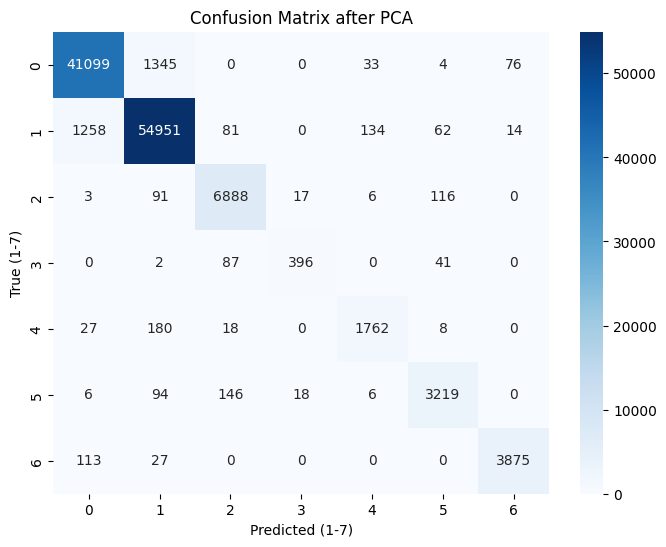

[[41099  1345     0     0    33     4    76]
 [ 1258 54951    81     0   134    62    14]
 [    3    91  6888    17     6   116     0]
 [    0     2    87   396     0    41     0]
 [   27   180    18     0  1762     8     0]
 [    6    94   146    18     6  3219     0]
 [  113    27     0     0     0     0  3875]]


In [36]:
# Compute confusion matrix for PCA, Use pca_knn to make predictions
pca_y_pred = pca_knn.predict(pca_X_test_transformed)
plot_confusion_matrix(pca_y_test, pca_y_pred, "Confusion Matrix after PCA")

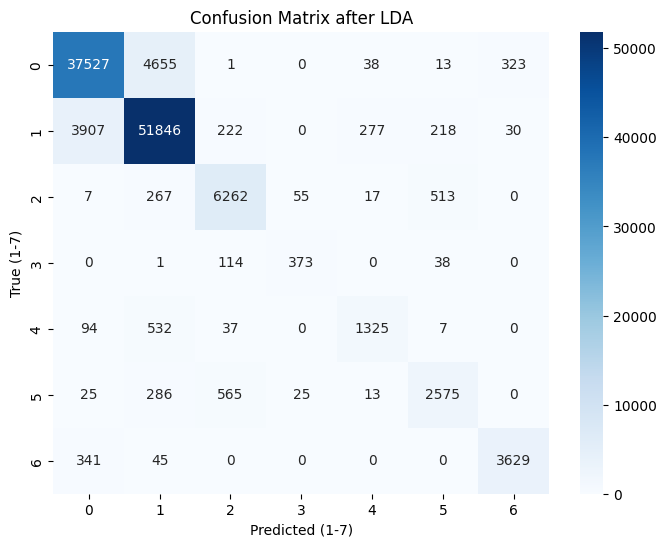

[[37527  4655     1     0    38    13   323]
 [ 3907 51846   222     0   277   218    30]
 [    7   267  6262    55    17   513     0]
 [    0     1   114   373     0    38     0]
 [   94   532    37     0  1325     7     0]
 [   25   286   565    25    13  2575     0]
 [  341    45     0     0     0     0  3629]]


In [37]:
# Compute confusion matrix for LDA, Use pca_knn to make predictions.
lda_y_pred = lda_knn.predict(lda_X_test_transformed)
plot_confusion_matrix(lda_y_test, lda_y_pred, "Confusion Matrix after LDA")

In [38]:
# Print classification report
print("Classification Report for PCA:")
pca_report = classification_report(pca_y_test, pca_y_pred, output_dict=True)

# Access and print desired metrics from the dictionary
for pca_label, pca_metrics in pca_report.items():
    # Check if 'label' is not "accuracy" (the last element)
    if pca_label != "accuracy" and pca_label != "macro avg" and pca_label != "weighted avg":
        print(f"Class {pca_label}:")
        print(f"\tPrecision: {pca_metrics['precision']}")
        print(f"\tRecall: {pca_metrics['recall']}")
        print(f"\tF1-score: {pca_metrics['f1-score']}")
    elif pca_label == "accuracy":
        # Handle the accuracy score separately
        print(f"Accuracy: {pca_metrics}")
    elif pca_label == "macro avg":
        # Handle the macro avg separately
        print(f"Macro avg:")
        print(f"\tPrecision: {pca_metrics['precision']}")
        print(f"\tRecall: {pca_metrics['recall']}")
        print(f"\tF1-score: {pca_metrics['f1-score']}")
    else:
        # Handle the weighted avg separately
        print(f"Weighted avg:")
        print(f"\tPrecision: {pca_metrics['precision']}")
        print(f"\tRecall: {pca_metrics['recall']}")
        print(f"\tF1-score: {pca_metrics['f1-score']}")

Classification Report for PCA:
Class 1:
	Precision: 0.9668987907589517
	Recall: 0.9657400662640694
	F1-score: 0.966319081151617
Class 2:
	Precision: 0.9693243958370082
	Recall: 0.9725840707964601
	F1-score: 0.9709514974821097
Class 3:
	Precision: 0.9540166204986149
	Recall: 0.9672798764218509
	F1-score: 0.9606024684471097
Class 4:
	Precision: 0.9187935034802784
	Recall: 0.752851711026616
	F1-score: 0.8275862068965517
Class 5:
	Precision: 0.9077794951056156
	Recall: 0.8832080200501253
	F1-score: 0.8953252032520326
Class 6:
	Precision: 0.9330434782608695
	Recall: 0.9226139294926913
	F1-score: 0.9277993947254648
Class 7:
	Precision: 0.9773013871374527
	Recall: 0.9651307596513076
	F1-score: 0.9711779448621554
Accuracy: 0.9654656076004923
Macro avg:
	Precision: 0.946736810154113
	Recall: 0.9184869191004458
	F1-score: 0.9313945424024345
Weighted avg:
	Precision: 0.9653989294447276
	Recall: 0.9654656076004923
	F1-score: 0.9653856319049812


In [39]:
# Print classification report
print("Classification Report for LDA:")
lda_report = classification_report(lda_y_test, lda_y_pred, output_dict=True)

# Access and print desired metrics from the dictionary
for lda_label, lda_metrics in lda_report.items():
    # Check if 'label' is not "accuracy" (the last element)
    if lda_label != "accuracy" and lda_label != "macro avg" and lda_label != "weighted avg":
        print(f"Class {lda_label}:")
        print(f"\tPrecision: {lda_metrics['precision']}")
        print(f"\tRecall: {lda_metrics['recall']}")
        print(f"\tF1-score: {lda_metrics['f1-score']}")
    elif lda_label == "accuracy":
        # Handle the accuracy score separately
        print(f"Accuracy: {lda_metrics}")
    elif lda_label == "macro avg":
        # Handle the macro avg separately
        print(f"Macro avg:")
        print(f"\tPrecision: {lda_metrics['precision']}")
        print(f"\tRecall: {lda_metrics['recall']}")
        print(f"\tF1-score: {lda_metrics['f1-score']}")
    else:
        # Handle the weighted avg separately
        print(f"Weighted avg:")
        print(f"\tPrecision: {lda_metrics['precision']}")
        print(f"\tRecall: {lda_metrics['recall']}")
        print(f"\tF1-score: {lda_metrics['f1-score']}")

Classification Report for LDA:
Class 1:
	Precision: 0.8956110832677024
	Recall: 0.8818055784007331
	F1-score: 0.8886547159534917
Class 2:
	Precision: 0.8996043864519712
	Recall: 0.9176283185840708
	F1-score: 0.9085269687729997
Class 3:
	Precision: 0.869601444243855
	Recall: 0.879370874877124
	F1-score: 0.8744588744588745
Class 4:
	Precision: 0.8233995584988962
	Recall: 0.7091254752851711
	F1-score: 0.7620020429009193
Class 5:
	Precision: 0.7934131736526946
	Recall: 0.6641604010025063
	F1-score: 0.723055934515689
Class 6:
	Precision: 0.7654577883472057
	Recall: 0.7380338205789625
	F1-score: 0.7514956953159201
Class 7:
	Precision: 0.9113510798593671
	Recall: 0.9038605230386052
	F1-score: 0.9075903463798924
Accuracy: 0.891001092914985
Macro avg:
	Precision: 0.851205502045956
	Recall: 0.8134264273953103
	F1-score: 0.8308263683282552
Weighted avg:
	Precision: 0.8905133675379016
	Recall: 0.891001092914985
	F1-score: 0.8905667453777103
